In [11]:
# First importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
data = pd.read_csv("work_arrangement_burnout.csv")
print(data)

  Work_Arrangmenet Burnout_Level  Percentage
0           Hybrid        Medium       45.08
1           Hybrid           Low       19.17
2           Hybrid          High       35.75
3           Onsite        Medium       43.41
4           Onsite           Low       30.15
5           Onsite          High       26.44
6           Remote        Medium       39.80
7           Remote           Low       13.78
8           Remote          High       46.43


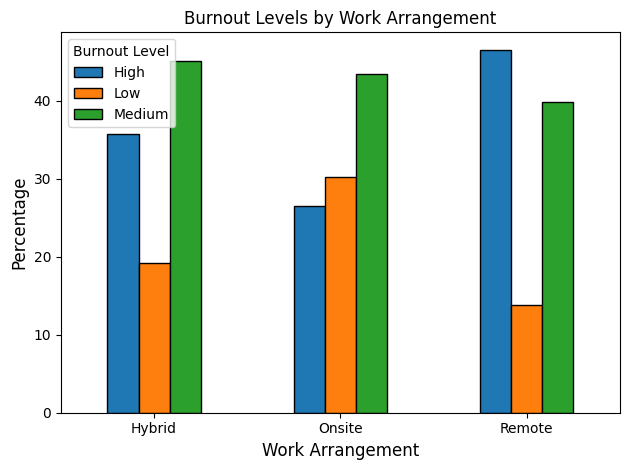

In [13]:
# Pivot the data to reshape for plotting
pivot_data = data.pivot(index="Work_Arrangmenet", columns="Burnout_Level", values="Percentage")

# Plotting
pivot_data.plot(kind='bar', edgecolor='black')

plt.title("Burnout Levels by Work Arrangement", size=12)
plt.ylabel("Percentage", size=12)
plt.xlabel("Work Arrangement", size=12)
plt.xticks(rotation=0)
plt.legend(title="Burnout Level")
plt.tight_layout()
plt.show()

In [22]:
data = pd.read_csv("work_arrangement_burnout_points.csv")
print(data)

  Work_Arrangement  Stress_Points
0           Hybrid         116.58
1           Onsite          96.29
2           Remote         132.66


In [23]:
df = pd.read_csv("work_arrangement_isolation.csv")
print(df)

  Work_Arrangement  Mean_Social_Isolation
0           Hybrid                   2.73
1           Onsite                   2.39
2           Remote                   3.48


In [24]:
print(np.std(data.Stress_Points))

14.881111816288753


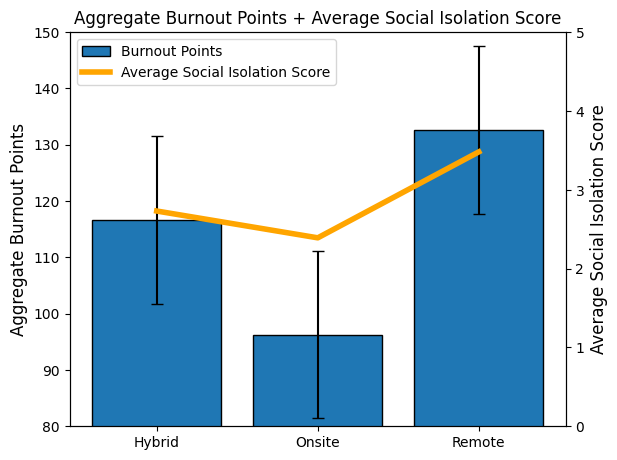

In [47]:
x_positions = np.arange(len(data))
fig, ax1 = plt.subplots(figsize=(6.4,5.12))

ax1.bar(data.Work_Arrangement, data.Stress_Points, edgecolor='black', label='Burnout Points')
ax1.set_ylabel('Aggregate Burnout Points', size=12)
ax1.set_ylim(80,150)

standard_deviation = np.std(data.Stress_Points)

errors = [standard_deviation] * len(data)

ax1.errorbar(
    x_positions,
    data['Stress_Points'],
    yerr=errors,
    fmt='none',
    ecolor='black',
    capsize=4
)

ax2 = ax1.twinx()
ax2.plot(df.Work_Arrangement, df.Mean_Social_Isolation, color='orange', linewidth=4, label='Average Social Isolation Score')
ax2.set_ylabel('Average Social Isolation Score', size=12)
ax2.set_ylim(0,5)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.title('Aggregate Burnout Points + Average Social Isolation Score')
plt.show()

In [17]:
data = pd.read_csv("work_arrangement_physical_illness.csv")
print(data)

  Work_Arrangement  Physical_Illness_%
0           Onsite               90.78
1           Remote               92.35
2           Hybrid               90.96


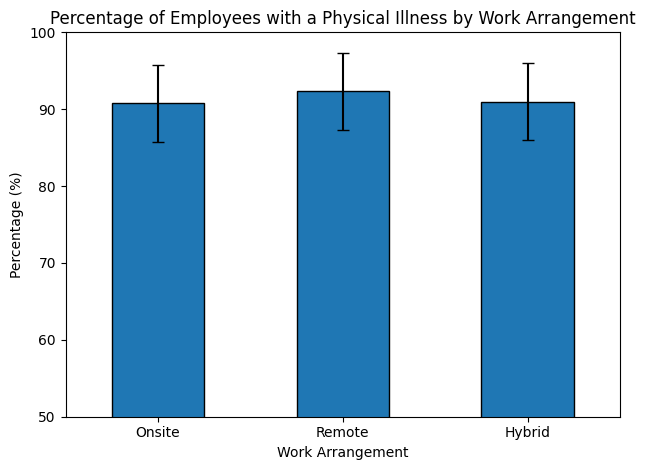

In [18]:
# Original bar plot
ax = data.plot(
    x='Work_Arrangement',
    y='Physical_Illness_%',
    kind='bar',
    legend=False,
    edgecolor='black'
)

# Get x positions of bars
x_positions = np.arange(len(data))

# Define fixed ±5% error
errors = [5] * len(data)

# Overlay error bars
plt.errorbar(
    x_positions, 
    data['Physical_Illness_%'], 
    yerr=errors, 
    fmt='none',       # no markers, just error bars
    ecolor='black', 
    capsize=4
)

# Formatting
plt.title("Percentage of Employees with a Physical Illness by Work Arrangement")
plt.ylim(50,100)
plt.ylabel("Percentage (%)")
plt.xlabel("Work Arrangement")
plt.xticks(x_positions, data['Work_Arrangement'], rotation=0)
plt.tight_layout()

plt.show()